In [697]:
import os
import sys
import re
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import importlib
import seaborn as sns

sys.path.append('..')
import catrace
import catrace.scale as catscale
import catrace.process_time_trace as ptt
import catrace.exp_collection as ecl
import catrace.cluster as caclust
import dataset_param as dtpar

In [698]:
region = 'Dp'
separate_region = False
if separate_region:
    all_dfovf_select = pd.read_pickle(os.path.join(dtpar.db_dir, 'all_dfovf_select.pkl'))
    all_dfovf_select_rg = all_dfovf_select.xs(region, level='region', axis=1)
    all_dfovf_select_rg.to_pickle(os.path.join(dtpar.db_dir, f'all_dfovf_select_{region}.pkl'))

In [699]:
compute_response = False
if compute_response:
    all_dfovf_select_rg = pd.read_pickle(os.path.join(dtpar.db_dir, f'all_dfovf_select_{region}.pkl'))
    if region =='OB':
        time_window = [5.5,11]
    else:
        time_window = [5,7]   
    frame_rate = 30/4
    all_response = ptt.mean_pattern_in_time_window(all_dfovf_select_rg, time_window, frame_rate)
    all_response.to_pickle(os.path.join(dtpar.db_dir, f'all_response_select_{region}.pkl'))
    all_response

In [700]:
all_response = pd.read_pickle(os.path.join(dtpar.db_dir, 'all_response_select_{}.pkl'.format(region)))
all_response

fish_id     2021-02-05-DpOBEM-JH9                                          \
cond                      phe-arg                                           
plane                           0                                           
neuron                        1         2         3         4         6     
odor  trial                                                                 
phe   0                  0.000200  0.209071  0.492094  0.474856 -0.013714   
      1                  0.243173 -0.022423  0.559050  0.397474  0.015055   
      2                  0.036004  0.048652  0.147587 -0.068843 -0.078841   
trp   0                 -0.020108  0.409061 -0.034526  0.172329  0.252261   
      1                  0.098764  0.288644  0.048206  0.129740  0.178743   
      2                  0.118979  0.330661 -0.034567 -0.066544  0.074195   
arg   0                  0.043738  0.141261 -0.030435  0.065854  0.461075   
      1                  0.069129  0.117999  0.238499  0.419269  0.127385   
      2                  0.017971  0.179629  0.189134  0.373900 -0.084077   
tdca  0                  0.055465  0.117861  0.071263 -0.057732  0.127823   
      1                  0.021753  0.089649 -0.086117 -0.004822 -0.021328   
      2                  0.075765  0.177125 -0.023670  0.316943  0.012088   
tca   0                  0.029793  0.113502  0.041647  0.120897  0.015454   
      1                  0.061789  0.046316  0.015583  0.064048  0.133865   
      2                  0.094398  0.015964 -0.001715 -0.047148  0.029763   
gca   0                 -0.062147 -0.072202 -0.056622  0.064611  0.056811   
      1                 -0.312422  0.081823  0.070302 -0.062725 -0.037224   
      2                  0.003238  0.111933  0.087542 -0.111042 -0.096473   
acsf  0                  0.129578  0.067252  0.113606  0.020651 -0.075632   
      1                  0.106135 -0.073797  0.018098  0.075378  0.125090   
      2                  0.164553  0.118102  0.104945  0.196501 -0.006301   
spont 0                  0.003318  0.107230  0.016274  0.087140  0.012023   
      1                  0.012960  0.026936 -0.073952 -0.121734 -0.027901   
      2                 -0.039621  0.006412 -0.098490 -0.204592  0.037356   

fish_id                                                        ...  \
cond                                                           ...   
plane                                                          ...   
neuron            7         8         12        17        22   ...   
odor  trial                                                    ...   
phe   0     -0.024605 -0.074521  0.092936 -0.007029 -0.020326  ...   
      1      0.074823 -0.010026  0.089967  0.020651 -0.006347  ...   
      2      0.151725 -0.014862  0.169540  0.140089  0.169556  ...   
trp   0      0.129817 -0.032269  0.094983  0.094825  0.048034  ...   
      1      0.128250  0.042115 -0.102639  0.068903  0.016555  ...   
      2     -0.059373  0.075893  0.065007  0.023148  0.116972  ...   
arg   0      0.033696  0.019058  0.010971  0.049436 -0.005199  ...   
      1      0.316417  0.155094 -0.021431  0.130642 -0.053902  ...   
      2     -0.059250  0.010679 -0.005548  0.056502  0.068987  ...   
tdca  0     -0.077840 -0.020798  0.098266  0.109144  0.045656  ...   
      1     -0.067299  0.038679 -0.030768  0.132517 -0.008783  ...   
      2     -0.078445  0.103355  0.056961 -0.014215  0.160220  ...   
tca   0     -0.133252  0.088258 -0.044862 -0.038487 -0.018844  ...   
      1      0.051403  0.103149  0.100475 -0.043041  0.059922  ...   
      2     -0.042293  0.114024  0.019450  0.101233  0.048663  ...   
gca   0      0.031446  0.085682 -0.075024 -0.078493 -0.037200  ...   
      1     -0.103984 -0.015952 -0.051851  0.009455 -0.064217  ...   
      2     -0.009670  0.017204  0.094498  0.088863 -0.051786  ...   
acsf  0      0.079401  0.060205  0.111486  0.047103 -0.052355  ...   
      1     -0.002489  0.144969  0.066520 -0.048894 -0.017864  ...   
      2      0.0

In [701]:
# Remove spont and ACSF odors
remove_control_odor = False
remove_odors = ['tca','tdca', 'gca','acsf', 'spont']
if remove_control_odor:
    all_response = all_response.drop(remove_odors, level=0, axis=0)

In [702]:
# Remvome first trial
remove_first_trial = False
if remove_first_trial:
    responses.drop([0], inplace=True, axis=0, level=1)
    responses.index.remove_unused_levels().levels[0]
    responses

In [703]:
# Average all trials
avg_trials = False
if avg_trials:
    responses = responses.groupby(level=0).mean()
    responses['trial'] = 0
    responses.set_index('trial', append=True, inplace=True)
    responses = responses.reindex(dtpar.odor_list, level='odor')
responses

fish_id     2021-02-05-DpOBEM-JH9                                          \
cond                      phe-arg                                           
plane                           0                                           
neuron                        1         2         3         4         6     
odor  trial                                                                 
phe   0                 -0.398815  0.869787  2.614093  2.084132 -0.529511   
      1                  2.055415 -1.159753  3.032630  1.661676 -0.293125   
      2                 -0.037170 -0.536624  0.460582 -0.884100 -1.064649   
trp   0                 -0.603946  2.623124 -0.677807  0.432537  1.655945   
      1                  0.596759  1.567418 -0.160650  0.200028  1.051865   
      2                  0.800952  1.935785 -0.678060 -0.871551  0.192815   
arg   0                  0.040956  0.275287 -0.652233 -0.148749  3.371722   
      1                  0.297422  0.071348  1.028874  1.780663  0.629866   
      2                 -0.219310  0.611662  0.720293  1.532981 -1.107670   
tdca  0                  0.159409  0.070137 -0.016520 -0.823443  0.633460   
      1                 -0.181114 -0.177198 -1.000302 -0.534589 -0.592074   
      2                  0.364456  0.589711 -0.609947  1.222031 -0.317504   
tca   0                 -0.099908  0.031925 -0.201649  0.151749 -0.289846   
      1                  0.223279 -0.557103 -0.364573 -0.158606  0.683107   
      2                  0.552657 -0.823204 -0.472705 -0.765663 -0.172273   
gca   0                 -1.028570 -1.596167 -0.815928 -0.155534  0.049975   
      1                 -3.556558 -0.245811 -0.022526 -0.850704 -0.722693   
      2                 -0.368130  0.018168  0.085239 -1.114482 -1.209530   
acsf  0                  0.908004 -0.373558  0.248167 -0.395524 -1.038278   
      1                  0.671219 -1.610156 -0.348855 -0.096754  0.611007   
      2                  1.261289  0.072252  0.194029  0.564499 -0.468600   
spont 0                 -0.367323 -0.023068 -0.360253 -0.032542 -0.318036   
      1                 -0.269930 -0.727010 -0.924256 -1.172854 -0.646089   
      2                 -0.801044 -0.906953 -1.077644 -1.625202 -0.109883   

fish_id                                                        ...  \
cond                                                           ...   
plane                                                          ...   
neuron            7         8         12        17        22   ...   
odor  trial                                                    ...   
phe   0     -0.409246 -2.018238  0.735979 -0.552843 -0.562676  ...   
      1      0.584434 -0.895542  0.693371 -0.136957 -0.364853  ...   
      2      1.352988 -0.979719  1.835481  1.657513  2.124436  ...   
trp   0      1.134037 -1.282730  0.765367  0.977451  0.404720  ...   
      1      1.118384  0.012115 -2.071117  0.588001 -0.040749  ...   
      2     -0.756713  0.600108  0.335116 -0.099450  1.380289  ...   
arg   0      0.173414 -0.389245 -0.440472  0.295521 -0.348604  ...   
      1      2.998905  1.978808 -0.905528  1.515590 -1.037822  ...   
      2     -0.755487 -0.535118 -0.677560  0.401683  0.701233  ...   
tdca  0     -0.941267 -1.083053  0.812489  1.192589  0.371072  ...   
      1     -0.835922 -0.047702 -1.039542  1.543760 -0.399320  ...   
      2     -0.947320  1.078161  0.219630 -0.660801  1.992307  ...   
tca   0     -1.495054  0.815361 -1.241840 -1.025470 -0.541704  ...   
      1      0.350372  1.074567  0.844189 -1.093895  0.572948  ...   
      2     -0.586020  1.263876 -0.318765  1.073727  0.413627  ...   
gca   0      0.150926  0.770514 -1.674763 -1.626543 -0.801461  ...   
      1     -1.202556 -0.998689 -1.342149 -0.305174 -1.183784  ...   
      2     -0.259987 -0.421525  0.758400  0.887875 -1.007870  ...   
acsf  0      0.630183  0.327017  1.002238  0.260455 -1.015927  ...   
      1     -0.188221  1.802557  0.356839 -1.181836 -0.527833  ...   
      2      0.3

In [704]:
# Scale responses
responses = catscale.standard_scale(all_response)
responses

/home/hubo/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/home/hubo/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


fish_id     2021-02-05-DpOBEM-JH9                                          \
cond                      phe-arg                                           
plane                           0                                           
neuron                        1         2         3         4         6     
odor  trial                                                                 
phe   0                 -0.398815  0.869787  2.614093  2.084132 -0.529511   
      1                  2.055415 -1.159753  3.032630  1.661676 -0.293125   
      2                 -0.037170 -0.536624  0.460582 -0.884100 -1.064649   
trp   0                 -0.603946  2.623124 -0.677807  0.432537  1.655945   
      1                  0.596759  1.567418 -0.160650  0.200028  1.051865   
      2                  0.800952  1.935785 -0.678060 -0.871551  0.192815   
arg   0                  0.040956  0.275287 -0.652233 -0.148749  3.371722   
      1                  0.297422  0.071348  1.028874  1.780663  0.629866   
      2                 -0.219310  0.611662  0.720293  1.532981 -1.107670   
tdca  0                  0.159409  0.070137 -0.016520 -0.823443  0.633460   
      1                 -0.181114 -0.177198 -1.000302 -0.534589 -0.592074   
      2                  0.364456  0.589711 -0.609947  1.222031 -0.317504   
tca   0                 -0.099908  0.031925 -0.201649  0.151749 -0.289846   
      1                  0.223279 -0.557103 -0.364573 -0.158606  0.683107   
      2                  0.552657 -0.823204 -0.472705 -0.765663 -0.172273   
gca   0                 -1.028570 -1.596167 -0.815928 -0.155534  0.049975   
      1                 -3.556558 -0.245811 -0.022526 -0.850704 -0.722693   
      2                 -0.368130  0.018168  0.085239 -1.114482 -1.209530   
acsf  0                  0.908004 -0.373558  0.248167 -0.395524 -1.038278   
      1                  0.671219 -1.610156 -0.348855 -0.096754  0.611007   
      2                  1.261289  0.072252  0.194029  0.564499 -0.468600   
spont 0                 -0.367323 -0.023068 -0.360253 -0.032542 -0.318036   
      1                 -0.269930 -0.727010 -0.924256 -1.172854 -0.646089   
      2                 -0.801044 -0.906953 -1.077644 -1.625202 -0.109883   

fish_id                                                        ...  \
cond                                                           ...   
plane                                                          ...   
neuron            7         8         12        17        22   ...   
odor  trial                                                    ...   
phe   0     -0.409246 -2.018238  0.735979 -0.552843 -0.562676  ...   
      1      0.584434 -0.895542  0.693371 -0.136957 -0.364853  ...   
      2      1.352988 -0.979719  1.835481  1.657513  2.124436  ...   
trp   0      1.134037 -1.282730  0.765367  0.977451  0.404720  ...   
      1      1.118384  0.012115 -2.071117  0.588001 -0.040749  ...   
      2     -0.756713  0.600108  0.335116 -0.099450  1.380289  ...   
arg   0      0.173414 -0.389245 -0.440472  0.295521 -0.348604  ...   
      1      2.998905  1.978808 -0.905528  1.515590 -1.037822  ...   
      2     -0.755487 -0.535118 -0.677560  0.401683  0.701233  ...   
tdca  0     -0.941267 -1.083053  0.812489  1.192589  0.371072  ...   
      1     -0.835922 -0.047702 -1.039542  1.543760 -0.399320  ...   
      2     -0.947320  1.078161  0.219630 -0.660801  1.992307  ...   
tca   0     -1.495054  0.815361 -1.241840 -1.025470 -0.541704  ...   
      1      0.350372  1.074567  0.844189 -1.093895  0.572948  ...   
      2     -0.586020  1.263876 -0.318765  1.073727  0.413627  ...   
gca   0      0.150926  0.770514 -1.674763 -1.626543 -0.801461  ...   
      1     -1.202556 -0.998689 -1.342149 -0.305174 -1.183784  ...   
      2     -0.259987 -0.421525  0.758400  0.887875 -1.007870  ...   
acsf  0      0.630183  0.327017  1.002238  0.260455 -1.015927  ...   
      1     -0.188221  1.802557  0.356839 -1.181836 -0.527833  ...   
      2      0.3

In [705]:
importlib.reload(caclust)
# Compute cluster labels
labels = caclust.compute_cluster(responses, k=35)

Finding 35 nearest neighbors using minkowski metric and 'auto' algorithm


/home/hubo/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/home/hubo/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


Neighbors computed in 6.754944086074829 seconds
Jaccard graph constructed in 1.4542913436889648 seconds
Wrote graph to binary file in 0.28261494636535645 seconds
Running Louvain modularity optimization
After 1 runs, maximum modularity is Q = 0.679588
After 6 runs, maximum modularity is Q = 0.680708
After 11 runs, maximum modularity is Q = 0.681817
Louvain completed 31 runs in 12.695820569992065 seconds
Sorting communities by size, please wait ...
PhenoGraph completed in 21.486543655395508 seconds


In [706]:
# Put cluster IDs into the data frame
importlib.reload(caclust)
cluster_df = caclust.get_cluster_df(responses, labels)
cluster_df

(phe, 0)  (phe, 1)  (phe, 2)  \
fish_id                cond    plane neuron                                 
2021-02-05-DpOBEM-JH9  phe-arg 0     1      -0.398815  2.055415 -0.037170   
2021-09-04-DpOBEM-JH18 arg-phe 1     90     -0.912093 -0.069779 -0.579881   
                                     80      1.450937  1.115512 -0.426955   
                                     70      1.002730  0.265908  0.307130   
                                     49      1.899298 -0.617212 -0.654978   
...                                               ...       ...       ...   
2021-09-15-DpOBEM-JH20 phe-arg 1     200     1.335022 -0.493459 -1.232506   
2021-09-02-DpOBEM-JH18 arg-phe 1     188     0.269941 -0.330996 -0.303666   
2021-11-24-DpOBEM-JH24 phe-trp 1     155     0.780968  0.446721  2.230967   
2021-04-02-DpOBEM-JH11 phe-arg 1     351    -1.128732  0.874375  1.498671   
2022-01-30-DpOBEM-N9   naive   0     379     0.760873  0.791295  0.757286   

                                             (trp, 0)  (trp, 1)  (trp, 2)  \
fish_id                cond    plane neuron                                 
2021-02-05-DpOBEM-JH9  phe-arg 0     1      -0.603946  0.596759  0.800952   
2021-09-04-DpOBEM-JH18 arg-phe 1     90      0.687615  1.649825 -1.318319   
                                     80     -0.407812 -0.545696  0.588081   
                                     70      0.972829 -0.442081 -0.356659   
                                     49     -1.406176  0.265471 -0.511701   
...                                               ...       ...       ...   
2021-09-15-DpOBEM-JH20 phe-arg 1     200     0.862755  2.052517 -0.849319   
2021-09-02-DpOBEM-JH18 arg-phe 1     188     0.762713 -0.154032  1.191031   
2021-11-24-DpOBEM-JH24 phe-trp 1     155    -0.130749 -0.261985 -1.541284   
2021-04-02-DpOBEM-JH11 phe-arg 1     351     0.298416 -1.016883  0.610502   
2022-01-30-DpOBEM-N9   naive   0     379    -0.923480 -1.140977  0.573611   

                                             (arg, 0)  (arg, 1)  (arg, 2)  \
fish_id                cond    plane neuron                                 
2021-02-05-DpOBEM-JH9  phe-arg 0     1       0.040956  0.297422 -0.219310   
2021-09-04-DpOBEM-JH18 arg-phe 1     90      0.591525  0.643659  0.440462   
                                     80      1.344592 -0.478512  0.350108   
                                     70      0.071868  1.350725 -0.139868   
                                     49      0.829357 -0.128993  0.354120   
...                                               ...       ...       ...   
2021-09-15-DpOBEM-JH20 phe-arg 1     200    -0.545142 -1.077782 -1.177977   
2021-09-02-DpOBEM-JH18 arg-phe 1     188     2.026684  1.966758  1.075917   
2021-11-24-DpOBEM-JH24 phe-trp 1     155     0.878068 -0.563188  0.237065   
2021-04-02-DpOBEM-JH11 phe-arg 1     351     0.270271 -1.444236  0.643301   
2022-01-30-DpOBEM-N9   naive   0     379     1.763257 -1.089083  0.282258   

                                             (tdca, 0)  ...  (gca, 0)  \
fish_id                cond    plane neuron             ...             
2021-02-05-DpOBEM-JH9  phe-arg 0     1        0.159409  ... -1.028570   
2021-09-04-DpOBEM-JH18 arg-phe 1     90      -0.927231  ...  0.291071   
                                     80      -1.122615  ...  0.770153   
                                     70      -1.715439  ... -0.134763   
                                     49      -0.680360  ... -0.336415   
...                                                ...  ...       ...   
2021-09-15-DpOBEM-JH20 phe-arg 1     200     -0.203046  ...  1.085947   
2021-09-02-DpOBEM-JH18 arg-phe 1     188      0.782713  ...  1.333957   
2021-11-24-DpOBEM-JH24 phe-trp 1     155     -0.317613  ...  0.509910   
2021-04-02-DpOBEM-JH11 phe-arg 1     351     -0.878650  ...  2.166173   
2022-01-30-DpOBEM-N9   naive   0     379     -0.541472  ...  1.021093   

                                             (gca, 1)  (gca, 2)  (acsf, 0)  \
fish_id    

/home/hubo/.local/lib/python3.8/site-packages/seaborn/axisgrid.py:670: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/home/hubo/.local/lib/python3.8/site-packages/seaborn/axisgrid.py:88: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  self._figure.tight_layout(*args, **kwargs)


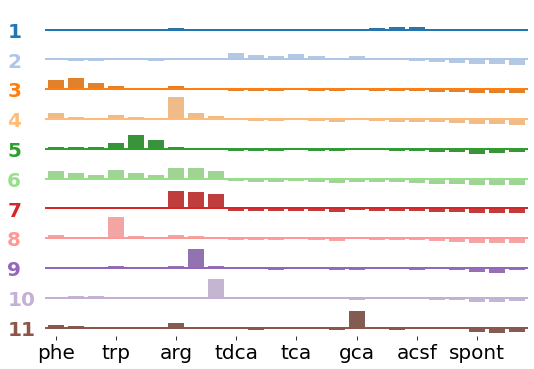

In [707]:
importlib.reload(caclust)
%matplotlib inline
cluster_cmap = 'tab20'
cluster_mean_df = caclust.get_cluster_mean_df(cluster_df)
fig = caclust.plot_cluster_tuning(cluster_mean_df, cmap=cluster_cmap)
fig_dir = dtpar.fig_dir
fig.savefig(os.path.join(fig_dir, f"cluster_mean_{region}.svg"))

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

6.0_arg-phe vs. 6.0_phe-trp: Mann-Whitney-Wilcoxon test two-sided, P_val:9.433e-01 U_stat=1.900e+01
7.0_arg-phe vs. 7.0_phe-trp: Mann-Whitney-Wilcoxon test two-sided, P_val:2.222e-01 U_stat=2.900e+01
8.0_arg-phe vs. 8.0_phe-trp: Mann-Whitney-Wilcoxon test two-sided, P_val:5.237e-01 U_stat=2.500e+01
9.0_arg-phe vs. 9.0_phe-trp: Mann-Whitney-Wilcoxon test two-sided, P_val:1.865e-02 U_stat=3.600e+01
10.0_arg-phe vs. 10.0_phe-trp: Mann-Whitney-Wilcoxon test two-sided, P_val:1.000e+00 U_stat=2.000e+01
11.0_arg-phe vs. 11.0_phe-trp: Mann-Whitney-Wilcoxon test two-sided, P_val:3.543e-01 U_stat=1.300e+01
3.0_phe-trp vs. 3.0_naive: Mann-Whitney-Wilcoxon test two-sided, P_val:8.329e-01 U_stat=2.200e+01
4.0_phe-arg vs. 4.0_arg-phe: Mann-Whitney-Wilcoxon test two-sided, P_val:5.726e-01 U_stat=3.300e+01
4.0_phe-trp vs. 4

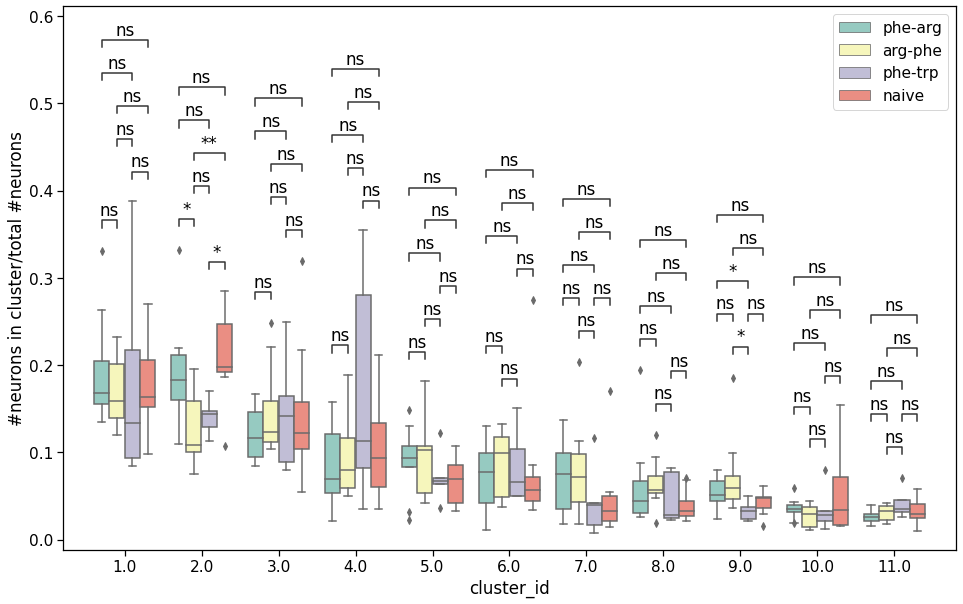

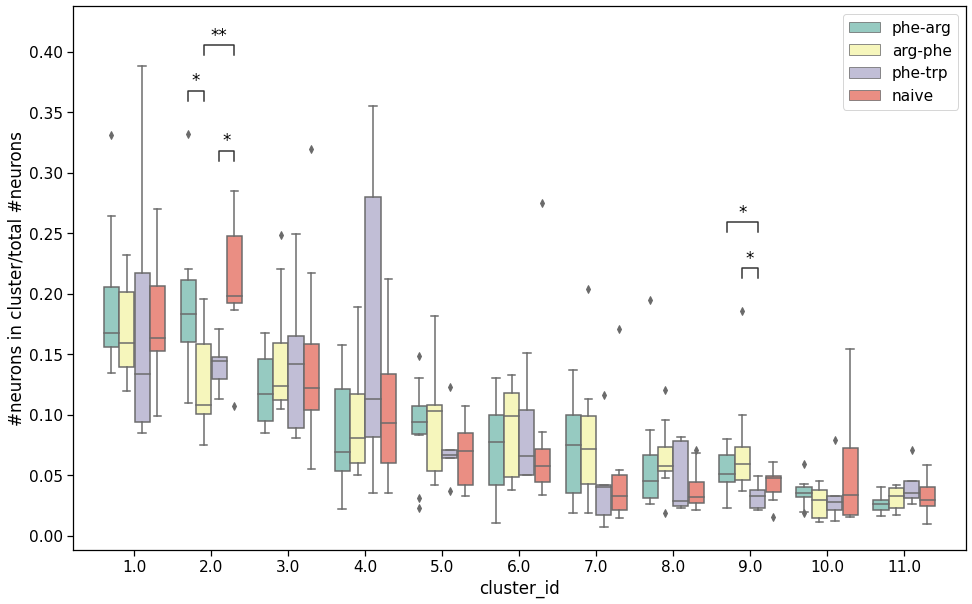

In [708]:
importlib.reload(caclust)
cluster_nrn_df = caclust.get_cluster_nrn_df(cluster_df)

selected_clusters = None
#selected_clusters = np.array([2,4,5,6,8,9,10,11])
# TODO function for select a.a. tuned neurons 
if selected_clusters is not None:
    cluster_nrn_df = cluster_nrn_df[cluster_nrn_df.cluster_id.isin(selected_clusters)]

cluster_count_df = caclust.get_cluster_count_df(cluster_nrn_df, dtpar.cond_list)

#cluster_count_df.to_csv('/media/hubo/WD_BoHu/temp_backup/cluster_count_df.csv')

importlib.reload(caclust)
cluster_ids = cluster_count_df.cluster_id.unique()
all_pairs = caclust.get_all_cond_pairs(dtpar.cond_list, cluster_ids)

importlib.reload(caclust)

#t-test_ind, t-test_welch, t-test_paired, Mann-Whitney, Mann-Whitney-gt, Mann-Whitney-ls, Levene, Wilcoxon, Kruskal
test_method = 'Mann-Whitney'
annotator, fig1 = caclust.plot_cluster_cont_with_stat(cluster_count_df, all_pairs,
                                                      dtpar.cond_list, test_method=test_method)

new_pairs = caclust.get_significant_pairs(annotator)
new_pairs

annotator2, fig2 = caclust.plot_cluster_cont_with_stat(cluster_count_df, new_pairs,
                                                       dtpar.cond_list, test_method=test_method)
fig2.savefig(os.path.join(fig_dir, f"cluster_cont_{region}.svg"))

In [709]:
ba_clusters = [1,2,3]
aa_all_response = all_response.loc[:,~cluster_df.cluster_id.isin(ba_clusters)]
aa_all_response

fish_id     2021-02-05-DpOBEM-JH9                                          \
cond                      phe-arg                                           
plane                           0                                           
neuron                        2         4         6         7         8     
odor  trial                                                                 
phe   0                  0.209071  0.474856 -0.013714 -0.024605 -0.074521   
      1                 -0.022423  0.397474  0.015055  0.074823 -0.010026   
      2                  0.048652 -0.068843 -0.078841  0.151725 -0.014862   
trp   0                  0.409061  0.172329  0.252261  0.129817 -0.032269   
      1                  0.288644  0.129740  0.178743  0.128250  0.042115   
      2                  0.330661 -0.066544  0.074195 -0.059373  0.075893   
arg   0                  0.141261  0.065854  0.461075  0.033696  0.019058   
      1                  0.117999  0.419269  0.127385  0.316417  0.155094   
      2                  0.179629  0.373900 -0.084077 -0.059250  0.010679   
tdca  0                  0.117861 -0.057732  0.127823 -0.077840 -0.020798   
      1                  0.089649 -0.004822 -0.021328 -0.067299  0.038679   
      2                  0.177125  0.316943  0.012088 -0.078445  0.103355   
tca   0                  0.113502  0.120897  0.015454 -0.133252  0.088258   
      1                  0.046316  0.064048  0.133865  0.051403  0.103149   
      2                  0.015964 -0.047148  0.029763 -0.042293  0.114024   
gca   0                 -0.072202  0.064611  0.056811  0.031446  0.085682   
      1                  0.081823 -0.062725 -0.037224 -0.103984 -0.015952   
      2                  0.111933 -0.111042 -0.096473 -0.009670  0.017204   
acsf  0                  0.067252  0.020651 -0.075632  0.079401  0.060205   
      1                 -0.073797  0.075378  0.125090 -0.002489  0.144969   
      2                  0.118102  0.196501 -0.006301  0.051380  0.041936   
spont 0                  0.107230  0.087140  0.012023 -0.102100  0.007573   
      1                  0.026936 -0.121734 -0.027901  0.041594 -0.000191   
      2                  0.006412 -0.204592  0.037356  0.062911  0.054804   

fish_id                                                        ...  \
cond                                                           ...   
plane                                                          ...   
neuron            17        26        31        32        36   ...   
odor  trial                                                    ...   
phe   0     -0.007029 -0.045851  0.041059  0.089206  0.037157  ...   
      1      0.020651  0.026551  0.054913  0.126616 -0.017980  ...   
      2      0.140089  0.095176 -0.061522 -0.001640  0.069269  ...   
trp   0      0.094825  0.040427  0.113775  0.200566  0.089864  ...   
      1      0.068903  0.069193  0.177413  0.054560  0.148424  ...   
      2      0.023148  0.073263  0.063749  0.084601  0.110752  ...   
arg   0      0.049436  0.037427  0.198568  0.175038 -0.018681  ...   
      1      0.130642  0.076538  0.079273  0.031451  0.110894  ...   
      2      0.056502  0.119508  0.176149  0.052447  0.036314  ...   
tdca  0      0.109144 -0.023496  0.004484  0.253218  0.070022  ...   
      1      0.132517  0.107919 -0.016800  0.041360  0.028772  ...   
      2     -0.014215  0.045252  0.121787  0.098446  0.025550  ...   
tca   0     -0.038487  0.065705  0.024355  0.210230 -0.012635  ...   
      1     -0.043041  0.017009  0.111434  0.186984  0.001169  ...   
      2      0.101233  0.112927 -0.015561 -0.056450  0.007225  ...   
gca   0     -0.078493 -0.080245  0.137381  0.037701  0.059076  ...   
      1      0.009455 -0.036071 -0.080917  0.022808  0.099494  ...   
      2      0.088863  0.091329  0.043518 -0.039560  0.103673  ...   
acsf  0      0.047103  0.055545 -0.016921 -0.046244  0.084063  ...   
      1     -0.048894  0.105419  0.255875  0.073131  0.087458  ...   
      2     -0.0

In [710]:
# Remove spont and ACSF odors
remove_control_ba = True
remove_odors = ['tca','tdca', 'gca','acsf', 'spont']
if remove_control_ba:
    aa_all_response = aa_all_response.drop(remove_odors, level=0, axis=0)

In [711]:
# Remvome first trial
aa_remove_first_trial = True
if aa_remove_first_trial:
    aa_all_response.drop([0], inplace=True, axis=0, level=1)
    aa_all_response.index.remove_unused_levels().levels[0] 

In [712]:
# Average all trials
avg_trials = True
if avg_trials:
    aa_all_response = aa_all_response.groupby(level=0).mean()
    aa_all_response['trial'] = 0
    aa_all_response.set_index('trial', append=True, inplace=True)
    aa_all_response = aa_all_response.reindex(dtpar.odor_list, level='odor')
aa_all_response

fish_id    2021-02-05-DpOBEM-JH9                                          \
cond                     phe-arg                                           
plane                          0                                           
neuron                       2         4         6         7         8     
odor trial                                                                 
phe  0                  0.013115  0.164316 -0.031893  0.113274 -0.012444   
trp  0                  0.309653  0.031598  0.126469  0.034439  0.059004   
arg  0                  0.148814  0.396585  0.021654  0.128583  0.082886   

fish_id                                                       ...  \
cond                                                          ...   
plane                                                         ...   
neuron           17        26        31        32        36   ...   
odor trial                                                    ...   
phe  0      0.080370  0.060863 -0.003304  0.062488  0.025644  ...   
trp  0      0.046026  0.071228  0.120581  0.069580  0.129588  ...   
arg  0      0.093572  0.098023  0.127711  0.041949  0.073604  ...   

fish_id    2022-02-20-DpOBEM-N11                                          \
cond                       naive                                           
plane                          3                                           
neuron                       142       183       189       238       295   
odor trial                                                                 
phe  0                  0.234807  0.081733  0.003155  0.301715  0.046220   
trp  0                  0.133857  0.092874  0.063157 -0.031916  0.188022   
arg  0                  0.230926  0.459492  0.061291  0.335175 -0.049514   

fish_id                                                       
cond                                                          
plane                                                         
neuron           360       385       390       405       439  
odor trial                                                    
phe  0      0.047211  0.181674  0.089723  0.055796  0.096606  
trp  0      0.008649  0.119114  0.133373  0.166663 -0.021903  
arg  0      0.071122  0.275475  0.181654  0.082120  0.191154  

[3 rows x 8105 columns]

In [713]:
# Scale responses
aa_do_scale = True
if aa_do_scale:
    aa_responses = catscale.standard_scale(aa_all_response)
else:
    aa_response = aa_all_response

/home/hubo/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/home/hubo/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


In [714]:
aa_responses

fish_id    2021-02-05-DpOBEM-JH9                                          \
cond                     phe-arg                                           
plane                          0                                           
neuron                       2         4         6         7         8     
odor trial                                                                 
phe  0                 -1.188712 -0.219991 -1.073980  0.513368 -1.372624   
trp  0                  1.257849 -1.099840  1.333812 -1.397885  0.391478   
arg  0                 -0.069138  1.319832 -0.259832  0.884517  0.981146   

fish_id                                                       ...  \
cond                                                          ...   
plane                                                         ...   
neuron           17        26        31        32        36   ...   
odor trial                                                    ...   
phe  0      0.351656 -1.011794 -1.412557  0.382542 -1.192046  ...   
trp  0     -1.362105 -0.349793  0.647012  0.987816  1.255014  ...   
arg  0      1.010449  1.361587  0.765545 -1.370358 -0.062968  ...   

fish_id    2022-02-20-DpOBEM-N11                                          \
cond                       naive                                           
plane                          3                                           
neuron                       142       183       189       238       295   
odor trial                                                                 
phe  0                  0.748253 -0.738611 -1.413685  0.603749 -0.157367   
trp  0                 -1.413399 -0.675128  0.740332 -1.409401  1.295822   
arg  0                  0.665147  1.413739  0.673353  0.805652 -1.138456   

fish_id                                                       
cond                                                          
plane                                                         
neuron           360       385       390       405       439  
odor trial                                                    
phe  0      0.189758 -0.162057 -1.203669 -0.966904  0.091636  
trp  0     -1.308549 -1.135649 -0.041116  1.377221 -1.267989  
arg  0      1.118790  1.297705  1.244785 -0.410317  1.176353  

[3 rows x 8105 columns]

In [715]:
importlib.reload(caclust)
# Compute cluster labels
aa_labels = caclust.compute_cluster(aa_responses, k=300)

Finding 300 nearest neighbors using minkowski metric and 'auto' algorithm


/home/hubo/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/home/hubo/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


Neighbors computed in 0.23551058769226074 seconds
Jaccard graph constructed in 27.04384732246399 seconds
Wrote graph to binary file in 0.8309383392333984 seconds
Running Louvain modularity optimization
After 1 runs, maximum modularity is Q = 0.832608
After 2 runs, maximum modularity is Q = 0.835306
After 4 runs, maximum modularity is Q = 0.837026
Louvain completed 24 runs in 12.982558965682983 seconds
Sorting communities by size, please wait ...
PhenoGraph completed in 41.55367302894592 seconds


In [716]:
# Put cluster IDs into the data frame
importlib.reload(caclust)
aa_cluster_df = caclust.get_cluster_df(aa_responses, aa_labels)
aa_cluster_df

(phe, 0)  (trp, 0)  (arg, 0)  \
fish_id                cond    plane neuron                                 
2021-07-31-DpOBEM-JH17 arg-phe 1     371    -0.899174  1.394899 -0.495724   
2021-11-24-DpOBEM-JH24 phe-trp 3     35     -0.718309  1.414154 -0.695845   
2021-10-02-DpOBEM-JH21 arg-phe 0     184    -0.694417  1.414138 -0.719721   
2021-09-17-DpOBEM-JH20 phe-arg 1     114    -1.050830  1.345060 -0.294230   
2021-09-02-DpOBEM-JH18 arg-phe 0     235    -0.888709  1.397060 -0.508350   
...                                               ...       ...       ...   
2021-11-26-DpOBEM-JH24 phe-trp 1     315    -0.053440  1.250590 -1.197150   
2021-09-18-DpOBEM-JH20 phe-arg 0     301    -0.150059  1.292860 -1.142801   
                                     313    -0.339285  1.358619 -1.019334   
2021-07-16-DpOBEM-N3   naive   1     166    -0.165708  1.299162 -1.133454   
2021-04-02-DpOBEM-JH11 phe-arg 2     317    -0.074743  1.260404 -1.185662   

                                             cluster_id  
fish_id                cond    plane neuron              
2021-07-31-DpOBEM-JH17 arg-phe 1     371            1.0  
2021-11-24-DpOBEM-JH24 phe-trp 3     35             1.0  
2021-10-02-DpOBEM-JH21 arg-phe 0     184            1.0  
2021-09-17-DpOBEM-JH20 phe-arg 1     114            1.0  
2021-09-02-DpOBEM-JH18 arg-phe 0     235            1.0  
...                                                 ...  
2021-11-26-DpOBEM-JH24 phe-trp 1     315           13.0  
2021-09-18-DpOBEM-JH20 phe-arg 0     301           13.0  
                                     313           13.0  
2021-07-16-DpOBEM-N3   naive   1     166           13.0  
2021-04-02-DpOBEM-JH11 phe-arg 2     317           13.0  

[8105 rows x 4 columns]

/home/hubo/.local/lib/python3.8/site-packages/seaborn/axisgrid.py:670: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/home/hubo/.local/lib/python3.8/site-packages/seaborn/axisgrid.py:88: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  self._figure.tight_layout(*args, **kwargs)


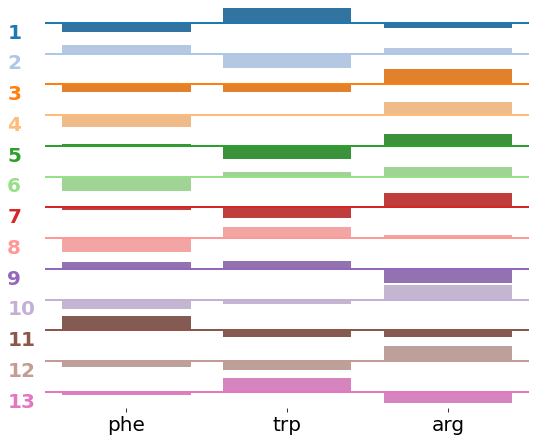

In [717]:
importlib.reload(caclust)
%matplotlib inline
cluster_cmap = 'tab20'
aa_cluster_mean_df = caclust.get_cluster_mean_df(aa_cluster_df)
fig = caclust.plot_cluster_tuning(aa_cluster_mean_df, cmap=cluster_cmap)
fig_dir = dtpar.fig_dir
#fig.savefig(os.path.join(fig_dir, f"aa_cluster_mean_{region}.svg"))

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

6.0_arg-phe vs. 6.0_phe-trp: Mann-Whitney-Wilcoxon test two-sided, P_val:7.242e-01 U_stat=2.300e+01
7.0_arg-phe vs. 7.0_phe-trp: Mann-Whitney-Wilcoxon test two-sided, P_val:6.216e-01 U_stat=2.400e+01
8.0_arg-phe vs. 8.0_phe-trp: Mann-Whitney-Wilcoxon test two-sided, P_val:5.237e-01 U_stat=2.500e+01
9.0_arg-phe vs. 9.0_phe-trp: Mann-Whitney-Wilcoxon test two-sided, P_val:5.237e-01 U_stat=1.500e+01
10.0_arg-phe vs. 10.0_phe-trp: Mann-Whitney-Wilcoxon test two-sided, P_val:7.242e-01 U_stat=1.700e+01
11.0_arg-phe vs. 11.0_phe-trp: Mann-Whitney-Wilcoxon test two-sided, P_val:9.324e-02 U_stat=8.000e+00
12.0_arg-phe vs. 12.0_phe-trp: Mann-Whitney-Wilcoxon test two-sided, P_val:1.274e-01 U_stat=3.100e+01
13.0_arg-phe vs. 13.0_phe-trp: Mann-Whitney-Wilcoxon test two-sided, P_val:1.000e+00 U_stat=2.000e+01
3.0_phe-trp

11.0_phe-arg vs. 11.0_phe-trp: Mann-Whitney-Wilcoxon test two-sided, P_val:3.148e-02 U_stat=7.000e+00


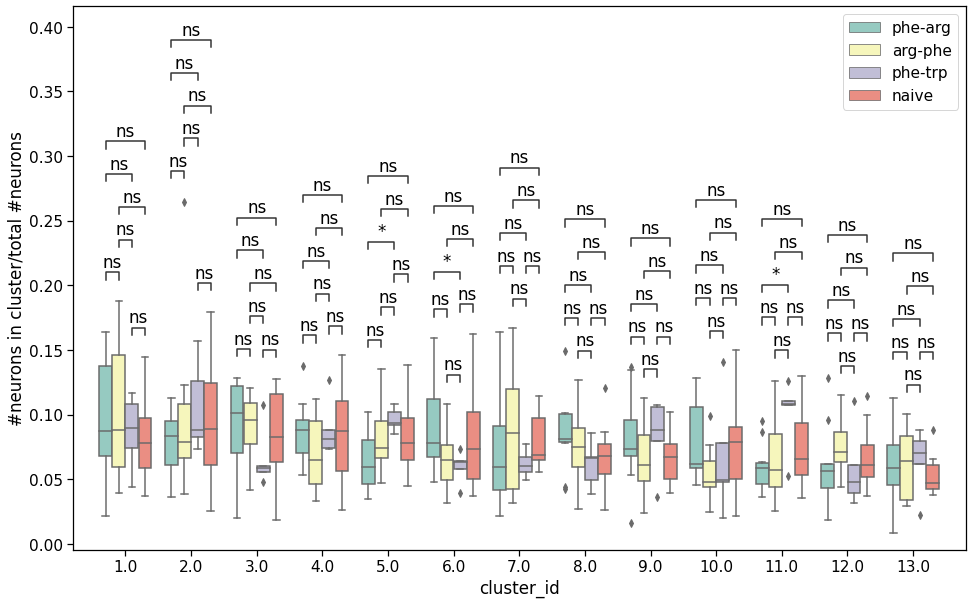

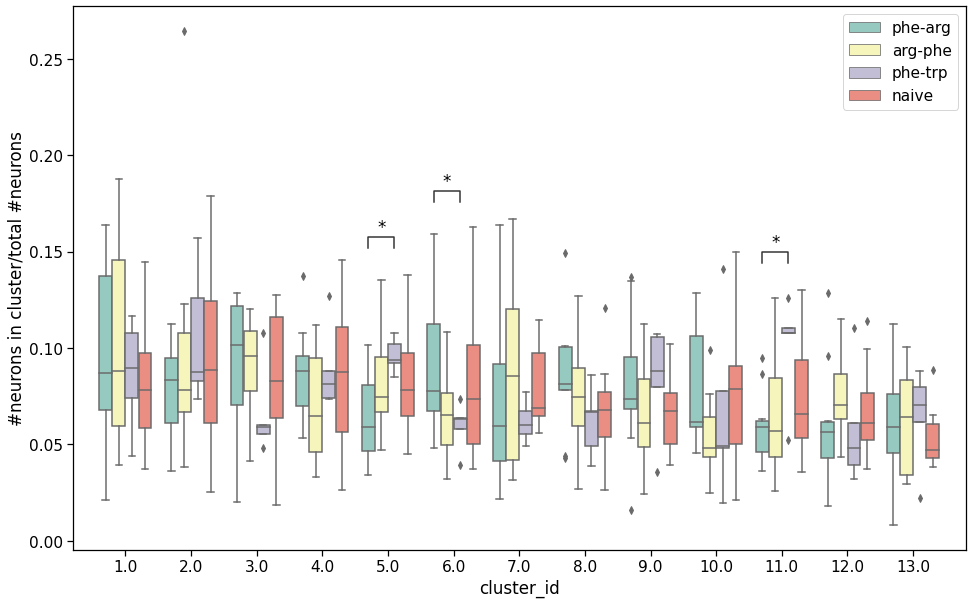

In [718]:
importlib.reload(caclust)
aa_cluster_nrn_df = caclust.get_cluster_nrn_df(aa_cluster_df)

aa_cluster_count_df = caclust.get_cluster_count_df(aa_cluster_nrn_df, dtpar.cond_list)

aa_cluster_ids = aa_cluster_count_df.cluster_id.unique()
all_pairs = caclust.get_all_cond_pairs(dtpar.cond_list, aa_cluster_ids)

#t-test_ind, t-test_welch, t-test_paired, Mann-Whitney, Mann-Whitney-gt, Mann-Whitney-ls, Levene, Wilcoxon, Kruskal
test_method = 'Mann-Whitney'
annotator, fig1 = caclust.plot_cluster_cont_with_stat(aa_cluster_count_df, all_pairs,
                                                      dtpar.cond_list, test_method=test_method)

new_pairs = caclust.get_significant_pairs(annotator)
new_pairs

annotator2, fig2 = caclust.plot_cluster_cont_with_stat(aa_cluster_count_df, new_pairs,
                                                       dtpar.cond_list, test_method=test_method)
fig2.savefig(os.path.join(fig_dir, f"aa_cluster_cont_{region}.svg"))

In [652]:
#cluster_df.to_pickle(os.path.join(dtpar.db_dir, 'cluster_df_{}.pkl'.format(region)))

In [653]:
#cluster_df = pd.read_pickle(os.path.join(dtpar.db_dir, 'cluster_df_{}.pkl'.format(region)))

In [720]:
aa_cluster_df.groupby('cluster_id').size()

cluster_id
1.0     753
2.0     702
3.0     702
4.0     681
5.0     632
6.0     623
7.0     620
8.0     614
9.0     596
10.0    592
11.0    574
12.0    545
13.0    471
dtype: int64

In [722]:
aa_cluster_df.groupby(['cond','cluster_id']).size()

cond     cluster_id
arg-phe  1.0           235
         2.0           205
         3.0           220
         4.0           168
         5.0           193
         6.0           143
         7.0           210
         8.0           167
         9.0           151
         10.0          136
         11.0          148
         12.0          182
         13.0          137
naive    1.0           141
         2.0           152
         3.0           148
         4.0           150
         5.0           133
         6.0           146
         7.0           143
         8.0           118
         9.0           114
         10.0          140
         11.0          120
         12.0          121
         13.0           90
phe-arg  1.0           266
         2.0           209
         3.0           237
         4.0           237
         5.0           173
         6.0           248
         7.0           178
         8.0           238
         9.0           214
         10.0          203
        